In [6]:
#Plots the finite of S2(n=1)-ln(N) for N^-(4g+1), for N=2,4,6,8,10,12,14

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
#__________________________________________________V=1.8, APBC____________________________________________________

#Load the data file
dataA1p8 = np.loadtxt('N1An1u_1.8.dat')

#Saves particle number to xA1p8 and the Renyi entropies to yA1p8. Note: 1p8 stands for 1.8
xA1p8=dataA1p8[:,0]
yA1p8=dataA1p8[:,3]
V=1.8
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(7):                         #Loop iterates for N=2,4,6,8,10,12,14 (i.e: range(7))
    xA1p8[i]=np.power(xA1p8[i],-(1+g*4))   #Raises each N to the power of the leading finite size correction γ=(4g+1)
a1, a0 = np.polyfit(xA1p8, yA1p8, 1)       #Linear fitting
for i in range(7):
    yA1p8[i]=(yA1p8[i]-a0)/a1              #a0 & a1 are coefficients arising from the fit
    

#NOTE: The following blocks of code follow the same structure but for different energies

#_________________________________________________________________________________________________________________
#__________________________________________________V=1.4, APBC____________________________________________________
dataA1p4 = np.loadtxt('N1An1u_1.4.dat')
xA1p4=dataA1p4[:,0]
yA1p4=dataA1p4[:,3]
V=1.4
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(7):
    xA1p4[i]=np.power(xA1p4[i],-(1+g*4))
a1, a0 = np.polyfit(xA1p4, yA1p4, 1)
for i in range(7):
    yA1p4[i]=(yA1p4[i]-a0)/a1
#_________________________________________________________________________________________________________________
#__________________________________________________V=1.0, APBC____________________________________________________
dataA1p0 = np.loadtxt('N1An1u_1.0.dat')
xA1p0=dataA1p0[:,0]
yA1p0=dataA1p0[:,3]
V=1.0
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(7):
    xA1p0[i]=np.power(xA1p0[i],-(1+g*4))
a1, a0 = np.polyfit(xA1p0, yA1p0, 1)
for i in range(7):
    yA1p0[i]=(yA1p0[i]-a0)/a1
#_________________________________________________________________________________________________________________

#__________________________________________________V=0.6, APBC____________________________________________________
dataA0p6 = np.loadtxt('N1An1u_0.6.dat')
xA0p6=dataA0p6[:,0]
yA0p6=dataA0p6[:,3]
V=0.6
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(7):
    xA0p6[i]=np.power(xA0p6[i],-(1+g*4))
a1, a0 = np.polyfit(xA0p6, yA0p6, 1)
for i in range(7):
    yA0p6[i]=(yA0p6[i]-a0)/a1
#_________________________________________________________________________________________________________________
#__________________________________________________V=0.2, APBC____________________________________________________
dataA0p2 = np.loadtxt('N1An1u_0.2.dat')
xA0p2=dataA0p2[:,0]
yA0p2=dataA0p2[:,3]
V=0.2
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(7):
    xA0p2[i]=np.power(xA0p2[i],-(1+g*4))
a1, a0 = np.polyfit(xA0p2, yA0p2, 1)
for i in range(7):
    yA0p2[i]=(yA0p2[i]-a0)/a1
#_________________________________________________________________________________________________________________
#__________________________________________________V=-0.1, APBC____________________________________________________
dataAn0p1 = np.loadtxt('N1An1u_-0.1.dat')
xAn0p1=dataAn0p1[:,0]
yAn0p1=dataAn0p1[:,3]
V=-0.1
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(7):
    xAn0p1[i]=np.power(xAn0p1[i],-(1+g*4))
a1, a0 = np.polyfit(xAn0p1, yAn0p1, 1)
for i in range(7):
    yAn0p1[i]=(yAn0p1[i]-a0)/a1
#_________________________________________________________________________________________________________________
#__________________________________________________V=-0.5, APBC____________________________________________________
dataAn0p5 = np.loadtxt('N1An1u_-0.5.dat')
xAn0p5=dataAn0p5[:,0]
yAn0p5=dataAn0p5[:,3]
V=-0.5
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(7):
    xAn0p5[i]=np.power(xAn0p5[i],-(1+g*4))
a1, a0 = np.polyfit(xAn0p5, yAn0p5, 1)
for i in range(7):
    yAn0p5[i]=(yAn0p5[i]-a0)/a1
#_________________________________________________________________________________________________________________

#__________________________________________________V=-0.9, APBC____________________________________________________
dataAn0p9 = np.loadtxt('N1An1u_-0.9.dat')
xAn0p9=dataAn0p9[:,0]
yAn0p9=dataAn0p9[:,3]
V=-0.9
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(7):
    xAn0p9[i]=np.power(xAn0p9[i],-(1+g*4))
a1, a0 = np.polyfit(xAn0p9, yAn0p9, 1)
for i in range(7):
    yAn0p9[i]=(yAn0p9[i]-a0)/a1
#_________________________________________________________________________________________________________________
#__________________________________________________V=-1.3, APBC____________________________________________________
dataAn1p3 = np.loadtxt('N1An1u_-1.3.dat')
xAn1p3=dataAn1p3[:,0]
yAn1p3=dataAn1p3[:,3]
V=-1.3
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(7):
    xAn1p3[i]=np.power(xAn1p3[i],-(1+g*4))
a1, a0 = np.polyfit(xAn1p3, yAn1p3, 1)
for i in range(7):
    yAn1p3[i]=(yAn1p3[i]-a0)/a1
#_________________________________________________________________________________________________________________




#__________________________________________________V=1.8, PBC____________________________________________________
dataP1p8 = np.loadtxt('N1Pn1u_1.8.dat')
xP1p8=dataP1p8[:,0]
yP1p8=dataP1p8[:,3]
V=1.8
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(6):
    xP1p8[i]=np.power(xP1p8[i],-(1+g*4))
a1, a0 = np.polyfit(xP1p8, yP1p8, 1)
for i in range(6):
    yP1p8[i]=(yP1p8[i]-a0)/a1
#_________________________________________________________________________________________________________________
#__________________________________________________V=1.4, PBC____________________________________________________
dataP1p4 = np.loadtxt('N1Pn1u_1.4.dat')
xP1p4=dataP1p4[:,0]
yP1p4=dataP1p4[:,3]
V=1.4
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(6):
    xP1p4[i]=np.power(xP1p4[i],-(1+g*4))
a1, a0 = np.polyfit(xP1p4, yP1p4, 1)
for i in range(6):
    yP1p4[i]=(yP1p4[i]-a0)/a1
#_________________________________________________________________________________________________________________
#__________________________________________________V=1.0, PBC____________________________________________________
dataP1p0 = np.loadtxt('N1Pn1u_1.0.dat')
xP1p0=dataP1p0[:,0]
yP1p0=dataP1p0[:,3]
V=1.0
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(6):
    xP1p0[i]=np.power(xP1p0[i],-(1+g*4))
a1, a0 = np.polyfit(xP1p0, yP1p0, 1)
for i in range(6):
    yP1p0[i]=(yP1p0[i]-a0)/a1
#_________________________________________________________________________________________________________________

#__________________________________________________V=0.6, PBC____________________________________________________
dataP0p6 = np.loadtxt('N1Pn1u_0.6.dat')
xP0p6=dataP0p6[:,0]
yP0p6=dataP0p6[:,3]
V=0.6
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(6):
    xP0p6[i]=np.power(xP0p6[i],-(1+g*4))
a1, a0 = np.polyfit(xP0p6, yP0p6, 1)
for i in range(6):
    yP0p6[i]=(yP0p6[i]-a0)/a1
#_________________________________________________________________________________________________________________
#__________________________________________________V=0.2, PBC____________________________________________________
dataP0p2 = np.loadtxt('N1Pn1u_0.2.dat')
xP0p2=dataP0p2[:,0]
yP0p2=dataP0p2[:,3]
V=0.2
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(6):
    xP0p2[i]=np.power(xP0p2[i],-(1+g*4))
a1, a0 = np.polyfit(xP0p2, yP0p2, 1)
for i in range(6):
    yP0p2[i]=(yP0p2[i]-a0)/a1
#_________________________________________________________________________________________________________________
#__________________________________________________V=-0.1, PBC____________________________________________________
dataPn0p1 = np.loadtxt('N1Pn1u_-0.1.dat')
xPn0p1=dataPn0p1[:,0]
yPn0p1=dataPn0p1[:,3]
V=-0.1
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(6):
    xPn0p1[i]=np.power(xPn0p1[i],-(1+g*4))
a1, a0 = np.polyfit(xPn0p1, yPn0p1, 1)
for i in range(6):
    yPn0p1[i]=(yPn0p1[i]-a0)/a1
#_________________________________________________________________________________________________________________
#__________________________________________________V=-0.5, PBC____________________________________________________
dataPn0p5 = np.loadtxt('N1Pn1u_-0.5.dat')
xPn0p5=dataPn0p5[:,0]
yPn0p5=dataPn0p5[:,3]
V=-0.5
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(6):
    xPn0p5[i]=np.power(xPn0p5[i],-(1+g*4))
a1, a0 = np.polyfit(xPn0p5, yPn0p5, 1)
for i in range(6):
    yPn0p5[i]=(yPn0p5[i]-a0)/a1
#_________________________________________________________________________________________________________________

#__________________________________________________V=-0.9, PBC____________________________________________________
dataPn0p9 = np.loadtxt('N1Pn1u_-0.9.dat')
xPn0p9=dataPn0p9[:,0]
yPn0p9=dataPn0p9[:,3]
V=-0.9
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(6):
    xPn0p9[i]=np.power(xPn0p9[i],-(1+g*4))
a1, a0 = np.polyfit(xPn0p9, yPn0p9, 1)
for i in range(6):
    yPn0p9[i]=(yPn0p9[i]-a0)/a1
#_________________________________________________________________________________________________________________
#__________________________________________________V=-1.3, PBC____________________________________________________
dataPn1p3 = np.loadtxt('N1Pn1u_-1.3.dat')
xPn1p3=dataPn1p3[:,0]
yPn1p3=dataPn1p3[:,3]
V=-1.3
k=np.pi/np.arccos(-V/2)/2
g=(k+1/k)/4-1/2
for i in range(6):
    xPn1p3[i]=np.power(xPn1p3[i],-(1+g*4))
a1, a0 = np.polyfit(xPn1p3, yPn1p3, 1)
for i in range(6):
    yPn1p3[i]=(yPn1p3[i]-a0)/a1
#_________________________________________________________________________________________________________________


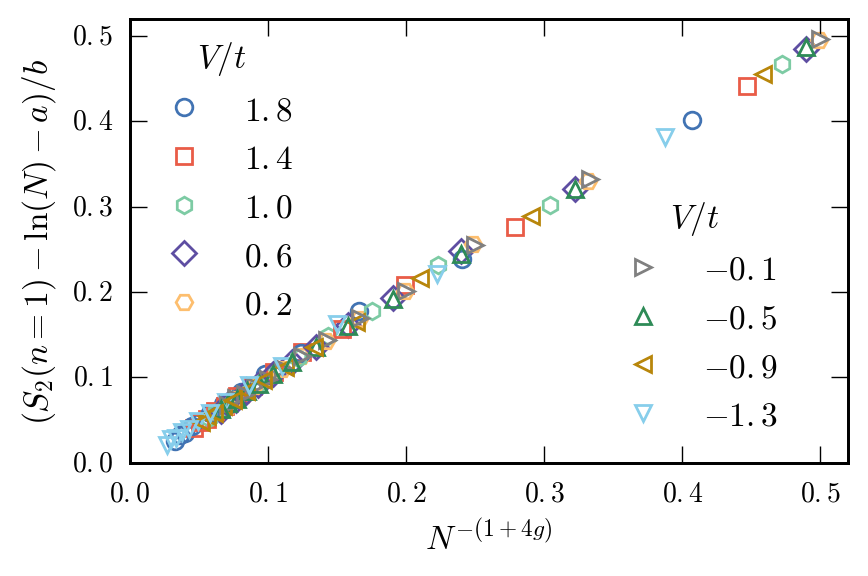

In [8]:
plt.style.reload_library()
#Replace the directory of the stylefile to the directory where your desired stylefile is located
with plt.style.context('/Users/ecasiano/anaconda3/pkgs/matplotlib-1.5.3-np111py35_0/lib/python3.5/site-packages/matplotlib/style/IOP_large.mplstyle'):
    
    #Create the figure
    fig1 = plt.figure()
    ax2 = fig1.add_subplot(111)
    ax3 = fig1.add_subplot(111)
    ax2.set_xlabel(r'$N^{-(1+4g)}$')
    ax2.set_ylabel(r'$(S_2(n=1)-{\rm{ln}}(N)-a)/b$')
    ax2.set_xlim(0,0.52)
    ax2.set_ylim(0,0.52)

    #Plots (S2(n=1)-ln(N)-a)/b vs. N^-(4g+1) for U/t > 0
    ax2.plot(xA1p8,yA1p8,'o', c="#4173b3",mew=1.0,fillstyle='none',label=r'$1.8$')
    ax2.plot(xA1p4,yA1p4,'s', c='#e95c47',mew=1.0,fillstyle='none',label=r'$1.4$')
    ax2.plot(xA1p0,yA1p0,'h', c='#7dcba4',mew=1.0,fillstyle='none',label=r'$1.0$')
    ax2.plot(xA0p6,yA0p6,'D', c='#5e4ea2',mew=1.0,fillstyle='none',label=r'$0.6$')
    ax2.plot(xA0p2,yA0p2,'H', c='#fdbe6e',mew=1.0,fillstyle='none',label=r'$0.2$')
    
    #U/t > 0 legend
    ax2.legend(loc=(0.01,0.29),frameon=False,numpoints=1,ncol=1,title=r'$V/t$',shadow=True,fancybox=True)
    ax3 = ax2.twinx()
    ax3.set_xlim(0,0.52)
    ax3.set_ylim(0,0.52)

    #Plos (S2(n=1)-ln(N)-a)/b vs. N^-(4g+1) for U/t < 0
    ax3.plot(xAn0p1,yAn0p1,'>', c='#808080',mew=1.0,fillstyle='none',label=r'$-0.1$')
    ax3.plot(xAn0p5,yAn0p5,'^', c='#2e8b57',mew=1.0,fillstyle='none',label=r'$-0.5$')
    ax3.plot(xAn0p9,yAn0p9,'<', c='#b8860b',mew=1.0,fillstyle='none',label=r'$-0.9$')
    ax3.plot(xAn1p3,yAn1p3,'v', c='#87ceeb',mew=1.0,fillstyle='none',label=r'$-1.3$')

    #U/t < 0 legend
    ax1 = fig1.add_subplot(111)
    ax1.set_xlim(0,0.52)
    ax1.set_ylim(0,0.52)

    #Combine everyhing to the same figure
    ax1.plot(xP1p8,yP1p8,'o', c="#4173b3",mew=1.0,fillstyle='none')
    ax1.plot(xP1p4,yP1p4,'s', c='#e95c47',mew=1.0,fillstyle='none')
    ax1.plot(xP1p0,yP1p0,'h', c='#7dcba4',mew=1.0,fillstyle='none')
    ax1.plot(xP0p6,yP0p6,'D', c='#5e4ea2',mew=1.0,fillstyle='none')
    ax1.plot(xP0p2,yP0p2,'H', c='#fdbe6e',mew=1.0,fillstyle='none')
    ax1.plot(xPn0p1,yPn0p1,'>', c='#808080',mew=1.0,fillstyle='none')
    ax1.plot(xPn0p5,yPn0p5,'^', c='#2e8b57',mew=1.0,fillstyle='none')
    ax1.plot(xPn0p9,yPn0p9,'<', c='#b8860b',mew=1.0,fillstyle='none')
    ax1.plot(xPn1p3,yPn1p3,'v', c='#87ceeb',mew=1.0,fillstyle='none')

    
    ax3.legend(loc=(0.65,0.04),frameon=False,numpoints=1,ncol=1,title=r'$V/t$',shadow=True,fancybox=True)
    ax3.tick_params(
       axis='both',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       right='off',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelright='off') # labels along the bottom edge are off
    ax2.tick_params(
       axis='both',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       right='on',
       top='on')         # ticks along the top edge are off
    
    #Save the figure
    plt.savefig('finiteSizeScaling.pdf')
    plt.savefig('finiteSizeScaling.png')
